In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split# importing train test split from sklearn
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("car data.csv")# loading data into pandas dataframe

In [4]:
data.head()#displaying top five records of the data frame

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#checking the number of rows and columns in the dataframe
data.shape

(301, 9)

In [6]:
#descriptive analysis of the features present in the data
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
#finding out the object data type features present in the dataframe
categorical=data.dtypes[data.dtypes=="object"].index
categorical

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

### checking the number of different categories present in one feature of the data

In [8]:
car=data['Car_Name'].value_counts()
car

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [9]:
Fuel=data['Fuel_Type'].value_counts()
Fuel

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [10]:
seller_=data["Seller_Type"].value_counts()
seller_

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [11]:
Transmission=data['Transmission'].value_counts()
Transmission

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [12]:
#finding out that is there any null values in the data
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### encoding the categories in the numerical with the help of replace method in pandas

In [13]:
data["Seller_Type"].replace({"Dealer":0,"Individual":1},inplace=True)

In [14]:
data["Transmission"].replace({"Manual":0,"Automatic":1},inplace=True)

In [15]:
data["Fuel_Type"].replace({"Petrol":0,"Diesel":1,"CNG":2},inplace=True)

In [16]:
#displaying the top five records after encoding
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### splitting the data into target and independent variable

In [17]:
x=data.drop(["Car_Name","Selling_Price"],axis=1)
y=data["Selling_Price"]

In [18]:
print(x)#printing the independent variable

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission   
0    2014           5.59       27000          0            0             0  \
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [19]:
print(y)#printing the target variable

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [20]:
#splitting training data and testing data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
#importing Ridge for regression
from sklearn.linear_model import Ridge

In [22]:
rdg=Ridge(alpha=10)#creating an instance of Ridge class
rdg.fit(xtrain,ytrain)#fitting the model 


Ridge(alpha=10)

In [23]:
# prediction on training data
train_dp=rdg.predict(xtrain)



In [24]:
#model evaluation on training data
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


In [25]:
print("Mean absolute error on training data is:",mae(ytrain,train_dp))
print("Mean squared error on training data is:",mse(ytrain,train_dp))
print("Root mean squared error on training data is:",mse(ytrain,train_dp,squared=False))

Mean absolute error on training data is: 1.1511661954453862
Mean squared error on training data is: 3.1210453502854163
Root mean squared error on training data is: 1.7666480550141888


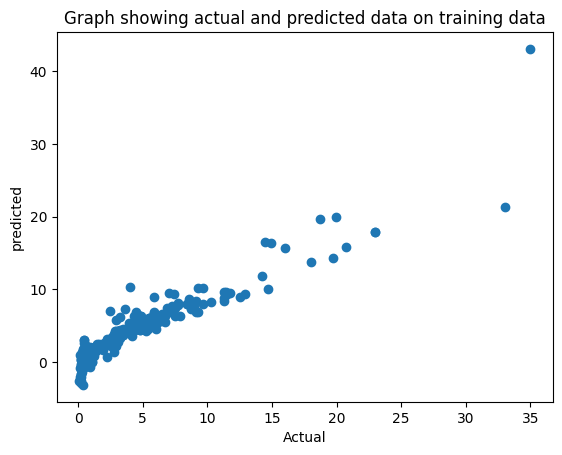

In [26]:
#visualizing the actual data and predicted data on training data
plt.scatter(ytrain,train_dp)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title("Graph showing actual and predicted data on training data")
plt.show()

In [27]:
#prediction on test data
ypred=rdg.predict(xtest)

In [28]:
# model evaluation on test data
print("Mean absolute error on training data is:",mae(ytest,ypred))
print("Mean squared error on training data is:",mse(ytest,ypred))
print("Root mean squared error on training data is:",mse(ytest,ypred,squared=False))

Mean absolute error on training data is: 1.2068699665536395
Mean squared error on training data is: 3.481243010007871
Root mean squared error on training data is: 1.865808942525432


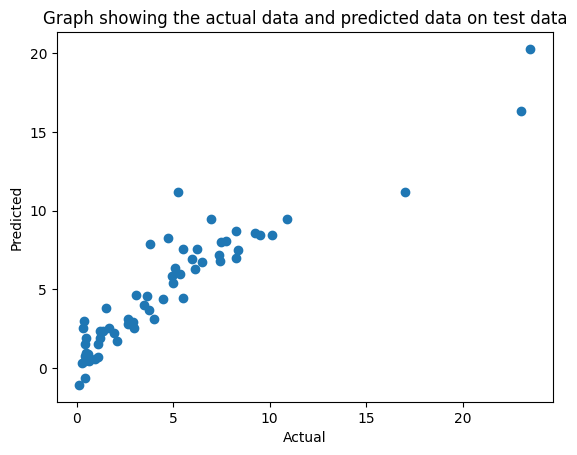

In [29]:
#visualizing the actual and predicted data on test data
plt.scatter(ytest,ypred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Graph showing the actual data and predicted data on test data")
plt.show()

In [30]:
# now using Decision tree we make the model prediction and evaluate the model
from sklearn.tree import DecisionTreeRegressor# import the regressor
dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=42)

In [31]:
#prediction on training data
train_dt=dtr.predict(xtrain)

In [32]:
# model evaluation on training data
print("Mean absolute error on training data is:",mae(ytrain,train_dt))
print("Mean squared error on training data is:",mse(ytrain,train_dt))
print("Root mean squared error on training data is:",mse(ytrain,train_dt,squared=False))

Mean absolute error on training data is: 1.0408340855860842e-18
Mean squared error on training data is: 4.81482486096809e-35
Root mean squared error on training data is: 6.938893903907228e-18


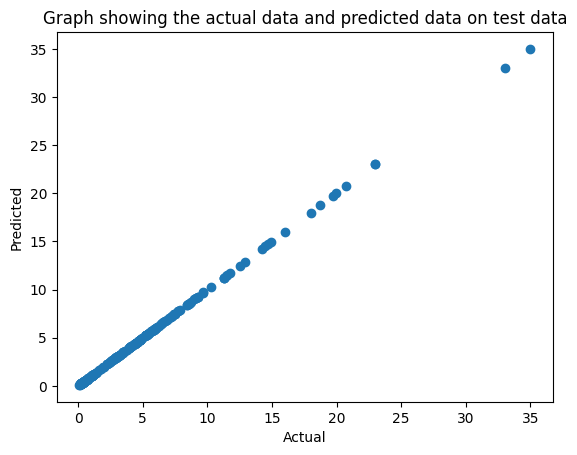

In [33]:
#visualizing the actual and predicted data on training data
plt.scatter(ytrain,train_dt)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Graph showing the actual data and predicted data on test data")
plt.show()

In [34]:
#prediction on test data
ypred=dtr.predict(xtest)

In [35]:
# model evaluation on test data
print("Mean absolute error on training data is:",mae(ytest,ypred))
print("Mean squared error on training data is:",mse(ytest,ypred))
print("Root mean squared error on training data is:",mse(ytest,ypred,squared=False))

Mean absolute error on training data is: 0.6701639344262295
Mean squared error on training data is: 1.0073475409836066
Root mean squared error on training data is: 1.00366704687541


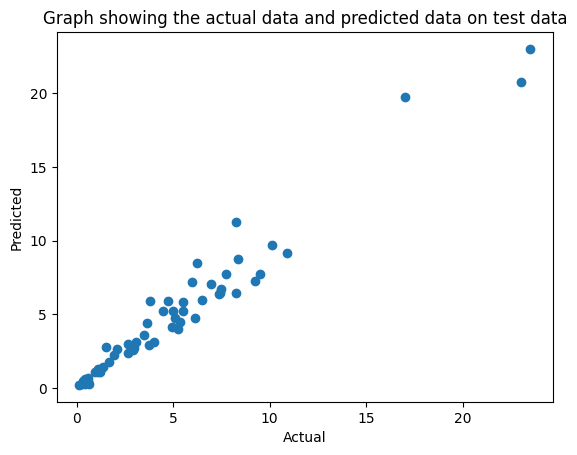

In [36]:
#visualizing the actual and predicted data on test data
plt.scatter(ytest,ypred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Graph showing the actual data and predicted data on test data")
plt.show()